In [883]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn import linear_model
import statsmodels.api as sm

import datetime as DT
from datetime import timedelta
import io
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [884]:
df_relation = pd.read_excel("2010 education.xlsx")
# df_relation = df_relation.drop([0, 1, 8])  #去掉北上津
# df_relation = df_relation.drop([25, 28, 30])  #去掉边疆

weight = df_relation['Population'].tolist()

df_relation.head()

,Provinces,"Univ Enroll Per 100,000 Pop","Univ Teacher Per 100,000 Pop","Educational Funds (10,000 yuan)","Education Fund Per 100,000 Person (yuan)",Per Capita GDP (yuan/person),Library Collections Per Person,Population,EXPND on Sci and Tec (100 mm yuan)
0,北京市,6196,682.466871,6134448,3.126630e+08,78307,0.95,19620000,178.92
1,天津市,4412,347.959969,2920970,2.248630e+08,54053,1.00,12990000,43.25
2,河北省,1951,131.359466,7192734,9.998240e+07,25308,0.24,71940000,29.65
3,山西省,2132,159.205372,4508195,1.261386e+08,25434,0.37,35740000,20.12
4,内蒙古自治区,1884,147.249191,4143731,1.676267e+08,33262,0.44,24720000,21.39


In [885]:
# TODO: 画地图

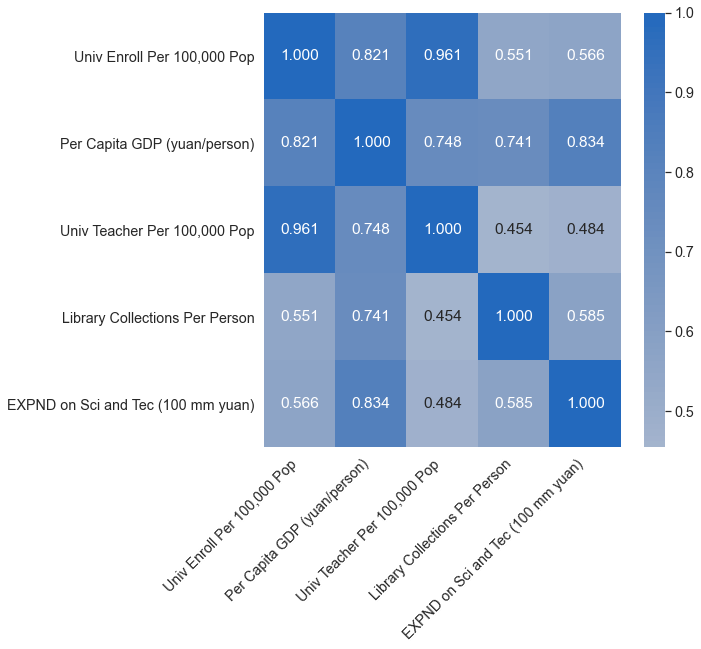

In [886]:
sb.set(font_scale=1.3)

num_vars = ['Univ Enroll Per 100,000 Pop',
            'Per Capita GDP (yuan/person)',
            'Univ Teacher Per 100,000 Pop',
            'Library Collections Per Person',
            'EXPND on Sci and Tec (100 mm yuan)']

plt.figure(figsize = [8, 8])
g = sb.heatmap(df_relation[num_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
g.set_xticklabels(labels=num_vars,rotation=45, ha='right')
plt.show()

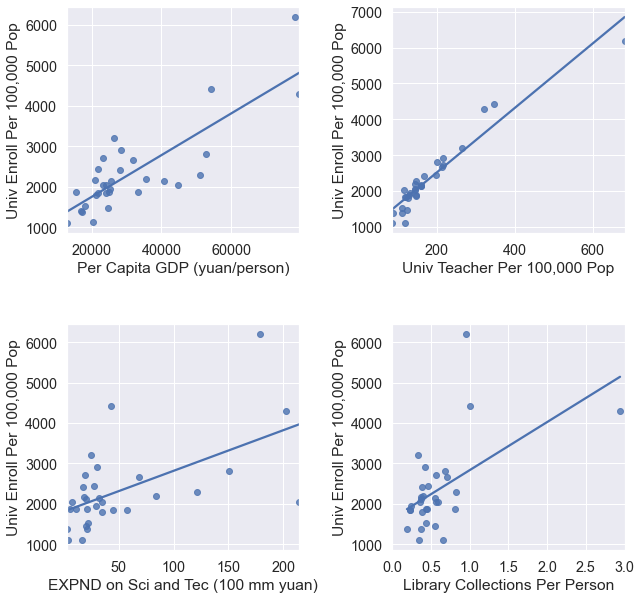

In [887]:
fig = plt.figure(figsize = [10, 10])
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
g = sb.regplot(df_relation['Per Capita GDP (yuan/person)'], df_relation['Univ Enroll Per 100,000 Pop'], ci=None)
ax = fig.add_subplot(2, 2, 2)
sb.regplot(df_relation['Univ Teacher Per 100,000 Pop'], df_relation['Univ Enroll Per 100,000 Pop'], ci=None)
ax = fig.add_subplot(2, 2, 3)
sb.regplot(df_relation['EXPND on Sci and Tec (100 mm yuan)'], df_relation['Univ Enroll Per 100,000 Pop'], ci=None)
ax = fig.add_subplot(2, 2, 4)
g = sb.regplot(df_relation['Library Collections Per Person'], df_relation['Univ Enroll Per 100,000 Pop'], ci=None)
# g.set(xlim=(0, 3))
g.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
plt.show()

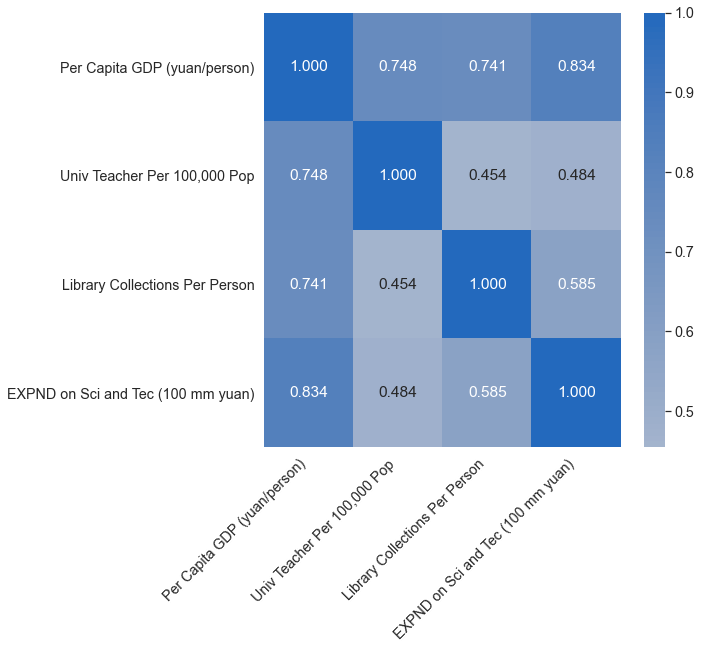

In [888]:
num_vars = ['Per Capita GDP (yuan/person)',
           'Univ Teacher Per 100,000 Pop',          
           'Library Collections Per Person',
           'EXPND on Sci and Tec (100 mm yuan)']

plt.figure(figsize = [8, 8])
g = sb.heatmap(df_relation[num_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
g.set_xticklabels(labels=num_vars,rotation=45, ha='right')
plt.show()

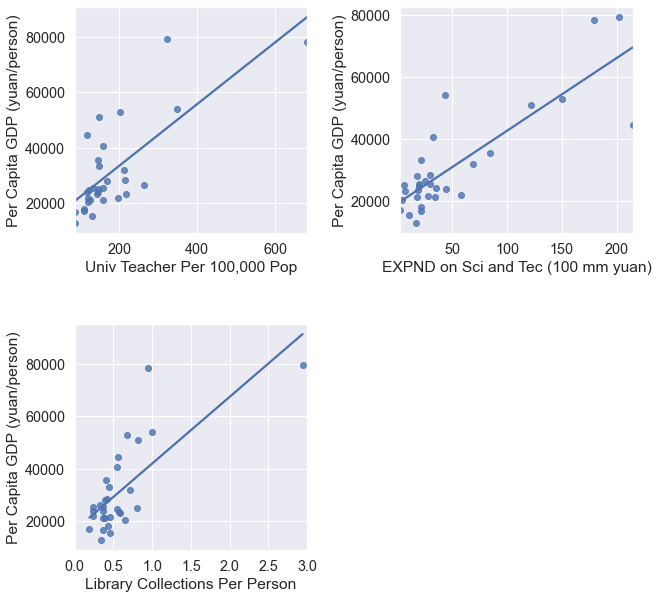

In [889]:
fig = plt.figure(figsize = [10, 10])
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sb.regplot(df_relation['Univ Teacher Per 100,000 Pop'], df_relation['Per Capita GDP (yuan/person)'], ci=None)
ax = fig.add_subplot(2, 2, 2)
sb.regplot(df_relation['EXPND on Sci and Tec (100 mm yuan)'], df_relation['Per Capita GDP (yuan/person)'], ci=None)
ax = fig.add_subplot(2, 2, 3)
g = sb.regplot(df_relation['Library Collections Per Person'], df_relation['Per Capita GDP (yuan/person)'], ci=None)
g.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
plt.show()

In [890]:
# Weighted Multiple Linear Regression
x_variables_list = ['Univ Teacher Per 100,000 Pop',
                    'EXPND on Sci and Tec (100 mm yuan)',
                    'Library Collections Per Person']

y_variable_list = ['Univ Enroll Per 100,000 Pop']

regr = linear_model.LinearRegression()

train_x = np.asanyarray(df_relation[x_variables_list])
train_y = np.asanyarray(df_relation[y_variable_list])

# regr.fit(train_x, train_y, weight)
# print('Coeffieicnts: ', regr.coef_)

X2 = sm.add_constant(train_x)
est = sm.WLS(train_y, X2, weights=weight)
est2 = est.fit()
print(est2.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            WLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     169.7
Date:                Thu, 06 May 2021   Prob (F-statistic):           1.25e-17
Time:                        17:24:37   Log-Likelihood:                -207.27
No. Observations:                  31   AIC:                             422.5
Df Residuals:                      27   BIC:                             428.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        710.7661     75.661      9.394      0.0